#                         NUMPY AND PANDAS PROJECT 


## PROBLEM STATEMENT

The Marketing campaign team of a Portuguese banking institution need to identify the factors that pull the customers to take the subscription of the bank's product namely the bank term deposit, as well as the reasons that keep them away from the subscription.

## Aim

The aim is to Determinate the factors for the subscription and nonsubscription using the ITP and NPV techniques. 

## DATASET DESCRIPTION

Bank Marketing: The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to assess if the product (bank term deposit) would be (or not) subscribed.

## DATA DICTIONARY

1) - age (numeric)

2) - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","bluecollar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means 
divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has a housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

- related to the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

- other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, 
includes the last contact

14 - P-days: number of days that passed by after the client was last contacted from a previous 
campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 
"unknown","other","failure","success")

- output variable (desired target):

17 - y - has the client subscribed to a term deposit? (binary: "yes","no")


## Dataset

### 1. Import data sets and Load data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)


In [2]:
import matplotlib.pyplot as plt

In [3]:
import plotly

In [4]:
import warnings

In [5]:
warnings.filterwarnings(action='ignore')

In [6]:
#Imported data sets and Loaded data set
df_bank= pd.read_csv('bank.csv')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Analysis

###  2.A. Identify the Features data types before entering into the analysis

In [7]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 2.B. Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.

In [13]:
df=df_bank.astype({'balance':float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 600.6+ KB


## 2C.Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.

In [14]:
df_bank.isnull().sum()         # To check for any null values. 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
# df.dropna()   This drops any null values present in the data set. 

## 2.D Find duplicates (if necessary)

In [16]:
df_duplicates=df_bank[df_bank.duplicated()]
print(df_duplicates)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


### 3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization. 

In [17]:
a1=pd.pivot_table(df_bank,index=["y"],values=["balance"],aggfunc=["mean"])
a1

,mean
,balance
y,
no,1403.211750
yes,1571.955854


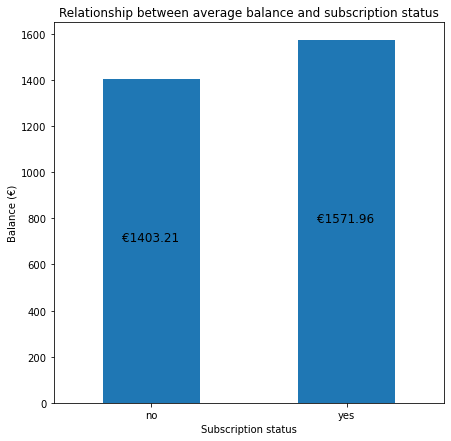

In [18]:
a1=df_bank.groupby('y')['balance'].mean().round(2)
plt.figure(figsize=(7,7))
a1.plot(kind='bar',rot=0)
plt.title("Relationship between average balance and subscription status")
plt.text(-0.15,a1[0]/2,f'€{a1[0]}',fontsize=12)
plt.text(0.85,a1[1]/2,f'€{a1[1]}',fontsize=12)
plt.xlabel("Subscription status")
plt.ylabel("Balance (€)")
plt.show()

### 4.Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

In [19]:
a1=df_bank.education.value_counts()
a1

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

Text(0.5, 1.0, 'Frequency distribution of the education')

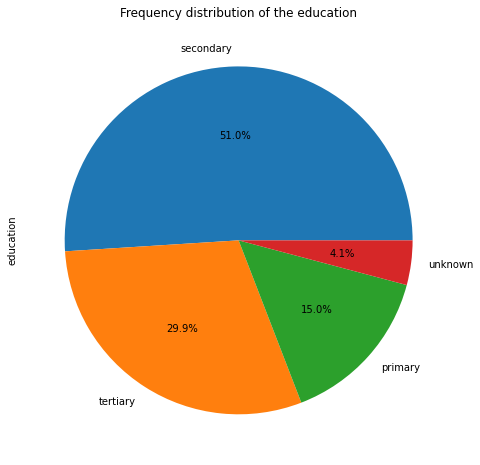

In [20]:
plt.figure(figsize=(18,8))
a1.plot(kind='pie',autopct = '%.1f%%')
plt.title("Frequency distribution of the education")

### 5. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [21]:
# bank['season']=bank['month'].map(season)

In [22]:
def Seasons(x):
    if x in ("dec","jan","feb",):
        return "Winter"
    elif x in ("mar","apr","may"):
        return "Spring"
    elif x in ("jun","jul","aug"):
        return "Summer"
    else:
        return "Autumn"
        

In [23]:
df_bank['Season']=df_bank['month'].map(Seasons)

In [24]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,Summer
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,Spring
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,Summer
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,Winter


### 6.  Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

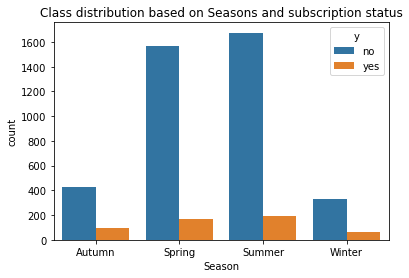

In [25]:
sns.countplot(x="Season",data=df_bank,hue="y")
plt.title("Class distribution based on Seasons and subscription status")
plt.show()

### 7.Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

In [26]:
df_bank[["y","pdays"]]

,y,pdays
0,no,-1
1,no,339
2,no,330
3,no,-1
4,no,-1
...,...,...
4516,no,-1
4517,no,-1
4518,no,-1
4519,no,211


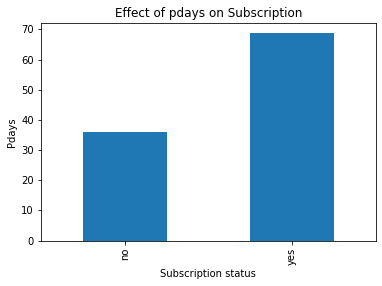

In [27]:
df_bank.groupby("y")["pdays"].mean().plot(kind='bar')
plt.title("Effect of pdays on Subscription")
plt.xlabel("Subscription status")
plt.ylabel("Pdays")
plt.show()

### 8. Replace the -1 as nan values for the P-days store.

In [28]:
df_bank["pdays"]=df_bank["pdays"].replace({-1:np.nan})
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,Spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no,Summer
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no,Spring
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,unknown,no,Summer
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no,Winter


### 9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

In [29]:
df_bank[["y","pdays"]]

,y,pdays
0,no,NaN
1,no,339.0
2,no,330.0
3,no,NaN
4,no,NaN
...,...,...
4516,no,NaN
4517,no,NaN
4518,no,NaN
4519,no,211.0


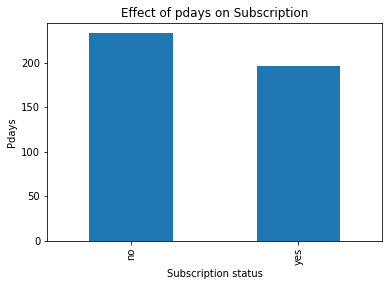

In [30]:
df_bank.groupby("y")["pdays"].mean().plot(kind='bar')
plt.title("Effect of pdays on Subscription")
plt.xlabel("Subscription status")
plt.ylabel("Pdays")
plt.show()

### 10. Does the customer take the term subscription who has less than 0 balance?

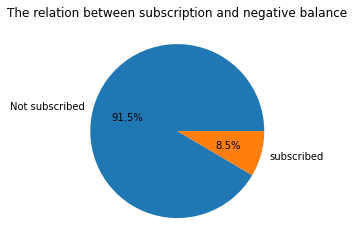

In [31]:
a10 = df['y'][df['balance'] < 0].value_counts()
plt.pie(a10,autopct='%.1f%%',labels=['Not subscribed','subscribed'])
plt.title("The relation between subscription and negative balance")
plt.show()

### 11. Use Pivot table to find the maximum balance for each type of job.

In [32]:
pd.pivot_table(df_bank,index=["job"],values=["balance"],aggfunc=["max"])

,max
,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394


### 12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

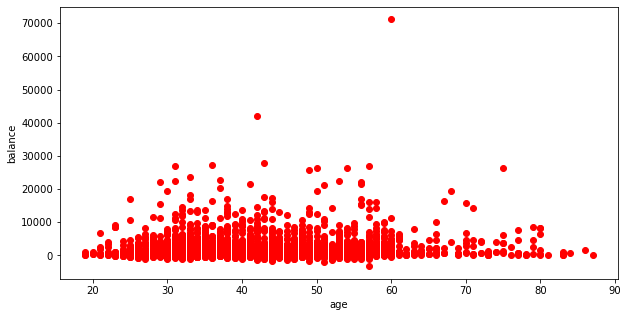

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(df_bank['age'],df_bank['balance'],color='r')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

### 13.Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

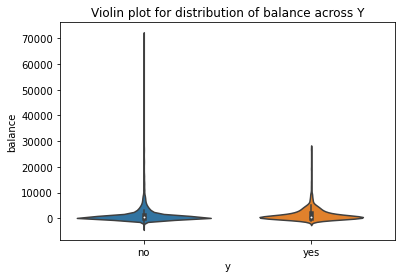

In [35]:
sns.violinplot(x='y',y='balance',data=df_bank)
plt.title("Violin plot for distribution of balance across Y")
plt.show()

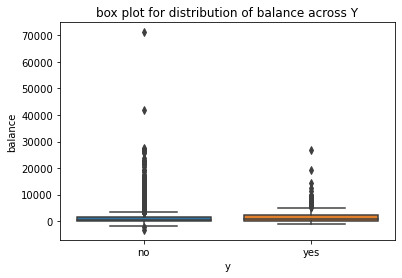

In [36]:
sns.boxplot(x='y',y='balance',data=df_bank)
plt.title("box plot for distribution of balance across Y")
plt.show()

### 14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.


In [37]:
def changetype(x):
    tru = ['yes','true','1',]
    fals = ['no','false','0']
    for i in x:
        if x[i].nunique() == 2 and x[i].dtype != bool:
            for j in x[i]:
                if j.lower() in tru:
                    x[i] = x[i].eq(j).astype('bool')
                    break
                elif j.lower() in fals:
                    x[i] = x[i].eq(j).astype('bool').replace({True:False,False:True})
                    break
    return x       

In [38]:
changetype(df_bank)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,False,1787,False,False,cellular,19,oct,79,1,NaN,0,unknown,False,Autumn
1,33,services,married,secondary,False,4789,True,True,cellular,11,may,220,1,339.0,4,failure,False,Spring
2,35,management,single,tertiary,False,1350,True,False,cellular,16,apr,185,1,330.0,1,failure,False,Spring
3,30,management,married,tertiary,False,1476,True,True,unknown,3,jun,199,4,NaN,0,unknown,False,Summer
4,59,blue-collar,married,secondary,False,0,True,False,unknown,5,may,226,1,NaN,0,unknown,False,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,False,-333,True,False,cellular,30,jul,329,5,NaN,0,unknown,False,Summer
4517,57,self-employed,married,tertiary,True,-3313,True,True,unknown,9,may,153,1,NaN,0,unknown,False,Spring
4518,57,technician,married,secondary,False,295,False,False,cellular,19,aug,151,11,NaN,0,unknown,False,Summer
4519,28,blue-collar,married,secondary,False,1137,False,False,cellular,6,feb,129,4,211.0,3,other,False,Winter


In [39]:
x=df_bank["default"].value_counts()
x

False    4445
True       76
Name: default, dtype: int64

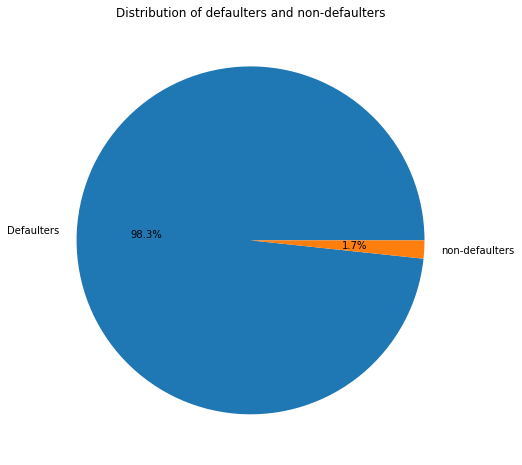

In [40]:
plt.figure(figsize=(10,8))
plt.pie(x,autopct='%.1f%%',labels=['Defaulters','non-defaulters'])
plt.title("Distribution of defaulters and non-defaulters")
plt.show()

### 15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

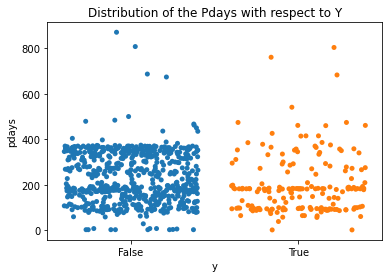

In [46]:
sns.stripplot(x='y',y='pdays',data=df_bank,jitter=0.4)
plt.title("Distribution of the Pdays with respect to Y")
plt.show()

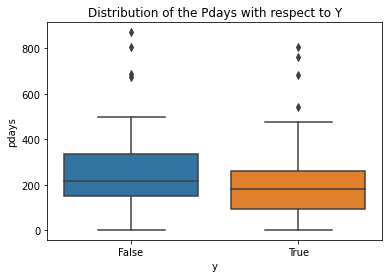

In [42]:
sns.boxplot(x='y',y='pdays',data=df_bank)
plt.title("Distribution of the Pdays with respect to Y")
plt.show()